In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
lap_times_df = pd.DataFrame(data=pd.read_csv('data/lap_times.csv'))

In [3]:
lap_times_df.tail()

,raceId,driverId,lap,position,time,milliseconds
538116,1096,822,53,16,1:32.998,92998
538117,1096,822,54,16,1:32.995,92995
538118,1096,822,55,16,1:31.236,91236
538119,1096,822,56,15,1:30.566,90566
538120,1096,822,57,15,1:30.743,90743


In [4]:
# specify to 2022 mexico race
mexico_lap_times_df = lap_times_df.loc[lap_times_df['raceId'] == 1094]

# select driver lap times over the course of the race
driver_0_lap_times = mexico_lap_times_df.loc[mexico_lap_times_df['driverId'] == 830, 'milliseconds']

# specify unique drivers,
# ? is this needed? What are we going to use this for exactly?
drivers = mexico_lap_times_df['driverId'].unique()

[Text(1, 0, 'driver 830')]

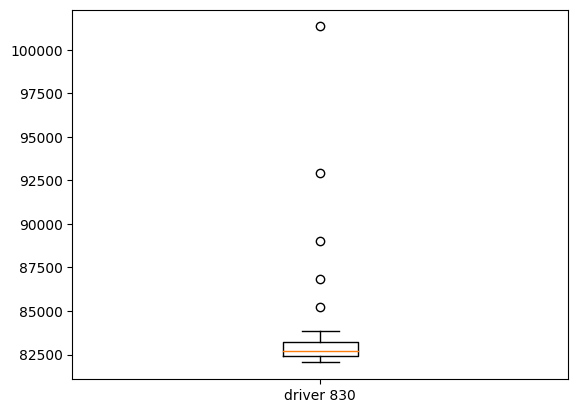

In [5]:
my_list = driver_0_lap_times.tolist()
my_dict = {'driver 830': my_list}


fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

